## Фаза 1. Неделя 1. Вторник
### Проверка статистических гипотез

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from matplotlib import pyplot as plt

## Блок 1. Устройство статистических тестов для проверки гипотез (пайплайн проверки гипотез)

1. Исходная выборка/выборки из ГС
2. Сформулировать основную и альтернативную гипотезы
3. Зафиксировать уровень значимости($\alpha$) и выбрать статистику
4. Вычисляем значение статистики, которое получили по выборке
5. Так как выборка это случайность, то __статистика(метрика) вычисленная по ней - тоже случайная величина, ведь зависит от выборки, полученной случайно, а значит имеет распределение__. Нам важно его знать
6. Зная распределение статистики, мы можем по полученному нами значению(пункт 4) понять, аномальное значение мы получили в конектсте нашего распределения или же нет.
7. Принять решение о справедливости гипотезы на уровне значимости $\alpha$



* [Небольшое видео об этом](https://vk.com/video/playlist/-92204627_81?section=playlist_81&z=video-92204627_456239812%2Fclub92204627%2Fpl_-92204627_81)

#### **Примечание:** 📚 В лекции у нас был пример с проверкой гипотезы о доле, а ниже задачи с гипотезой о среднем. Однако, все на самом деле работает точно так же по пайплайну, описанному выше. 🔄



##### 1.1 Проверка гипотезы о среднем

* у вас есть веб-сервис для онлайн-курсов, и вы решили внедрить новую ML-модель рекомендаций курсов для увеличения уровня участия студентов. Вы хотите оценить, насколько новая система рекомендаций влияет на время, которое студенты проводят на платформе.

* случайным образом выбрано 100 студентов и записано количество часов, которое они провели на платформе через месяц после.

* ранее среднее время составляло 29.07 часа. Проверьте, есть ли статистически значимое улучшение на уровне значимости $\alpha = 0.05$ от ML-модели.

$H_0: \mu = 29.07$

$H_1: \mu > 29.07$

In [4]:
arr = np.array(
    [
        28.91,
        26.45,
        30.97,
        32.58,
        30.23,
        27.26,
        31.33,
        30.4,
        28.29,
        27.26,
        26.08,
        33.19,
        29.18,
        27.32,
        31.36,
        30.74,
        28.86,
        27.87,
        26.37,
        33.56,
        29.09,
        27.81,
        31.07,
        30.73,
        28.94,
        27.02,
        26.76,
        33.97,
        29.73,
        27.86,
        31.28,
        30.01,
        28.55,
        27.1,
        26.46,
        33.22,
        29.55,
        27.41,
        31.09,
        30.88,
        28.01,
        27.48,
        26.61,
        33.19,
        29.67,
        27.22,
        31.02,
        30.16,
        28.92,
        27.79,
        26.58,
        33.81,
        29.42,
        27.89,
        31.13,
        30.15,
        28.51,
        27.21,
        26.53,
        33.1,
        29.14,
        27.27,
        31.71,
        30.84,
        28.05,
        27.16,
        26.04,
        33.7,
        29.92,
        27.89,
        31.87,
        30.99,
        28.84,
        27.5,
        26.87,
        33.6,
        30.0,
        27.32,
        31.85,
        30.67,
        28.94,
        27.69,
        26.65,
        33.29,
        29.34,
        27.71,
        31.62,
        30.48,
        28.18,
        27.77,
        26.61,
        33.19,
        29.7,
        27.47,
        31.05,
        30.14,
        28.4,
        27.52,
        26.19,
        34.04,
    ]
)

* Ну что ж, нам нужна __статистика__, которая агрегирует всю информацию о выборке.

* если выбрать статистику $T(X) = \dfrac{1}{n} \sum_{i=1}^{n}x_i = \overline{X}$, то мы имеем дело со знакомым уже нам выборчным средним. Можно как минимум воспользоваться [Центральной Предельной Теоремой](https://nesrakonk.ru/central_limit_theorem-2/), при ней мы знаем, что $\overline{X} \sim N(\mu, \dfrac{\sigma^2}{n})$

В Нашем случае мы предполагам что $\mu = 29.07$, но мы не знаем дисперсию $\sigma^2$ у ГС. Поэтому приблизим выборчной дисперсией $s^2 = \dfrac{1}{n-1} \sum_{i=1}^n (x_i - \overline{X}) ^ 2$.

* 1.1.1 Посчитайте значение статистики, полученной по нашей выборке

In [5]:
mu0 = 29.07
n = arr.size
df = n - 1
xbar = arr.mean()
s = arr.std(ddof=1)
se = s / np.sqrt(n)
t_stat = (xbar - mu0) / se
print(t_stat)

1.407181677990245


* 1.1.2 С помощью [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) создайте экземпляр класса распределения вашей статистики, с ее параметрами. 

In [6]:
distr = st.t(df=df, loc=0, scale=1)

* 1.1.3 Посчитайте критическое значение для вашей статистики

In [7]:
a = 0.05
t_crit = distr.ppf(1 - a)
print(t_crit)

1.6603911559963895


* 1.1.4 Нарисуйте график распределения вашей статистики, отобразите на нем следующее:
    1. Пунктирной линией t_stat
    2. Пунктирной линией t_crit

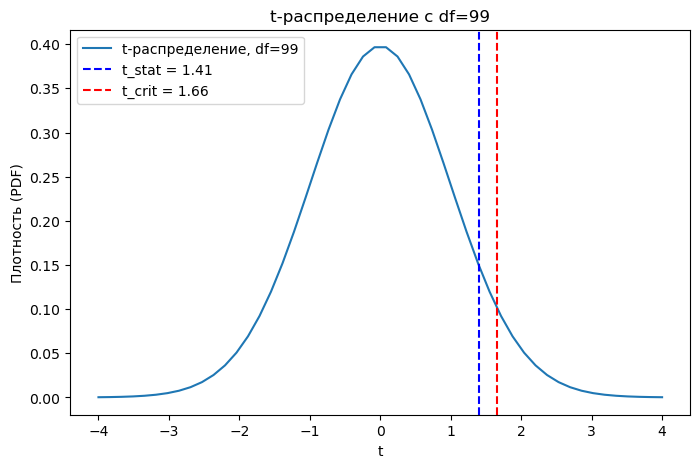

In [8]:
x = np.linspace(-4, 4)
y = distr.pdf(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label=f"t-распределение, df={df}")

plt.axvline(t_stat, color="blue", linestyle="--", label=f"t_stat = {t_stat:.2f}")
plt.axvline(t_crit, color="red", linestyle="--", label=f"t_crit = {t_crit:.2f}")

plt.title("t-распределение с df=99")
plt.xlabel("t")
plt.ylabel("Плотность (PDF)")
plt.legend()
plt.show()

* 1.1.5 Посчитайте p-value

In [9]:
p_value = 1 - st.t.cdf(t_stat, df=df)
print(p_value)

0.08125267165647299


* 1.1.6 На основании значения статистики и p-value, примите решение о справедливости гипотезы

> ваш ответ

Сатистически значимого роста среднего времени не выявлено, т.к p-value > альфа (а так же потому, что наша статистика меньше критического значения). Мы не отвергаем нулевую гипотезу. 

##### 1.2 В ресторане появилось новое экспериментальное блюдо, которое в планах должно заменить одно из старых блюд. Необходимо количественно оценить, лучше ли оно старого блюда, или нет. Для этого был проведен эксперимент, в рамках которого людям давали попробовать и просили оценить блюда по шкале от 1 до 10. Получились две выборки:

In [10]:
old = np.array(
    [
        6,
        8,
        4,
        7,
        8,
        7,
        5,
        9,
        7,
        6,
        9,
        8,
        6,
        9,
        5,
        7,
        10,
        8,
        6,
        7,
        8,
        10,
        8,
        7,
        9,
        6,
        7,
        8,
        5,
        9,
        9,
        8,
        8,
        6,
        6,
        7,
        9,
        7,
        7,
        7,
        7,
        8,
        8,
        7,
        8,
        6,
        8,
        8,
        8,
        8,
    ]
)
new = np.array(
    [
        9,
        8,
        5,
        9,
        10,
        9,
        6,
        8,
        8,
        8,
        9,
        7,
        7,
        8,
        6,
        9,
        7,
        9,
        8,
        8,
        7,
        7,
        8,
        5,
        9,
        8,
        7,
        7,
        7,
        9,
        8,
        8,
        7,
        7,
        9,
        8,
        9,
        6,
        5,
        9,
        8,
        9,
        6,
        9,
        9,
        8,
        10,
        8,
        10,
        10,
    ]
)

* Можно взглянуть на распределение оценок блюд

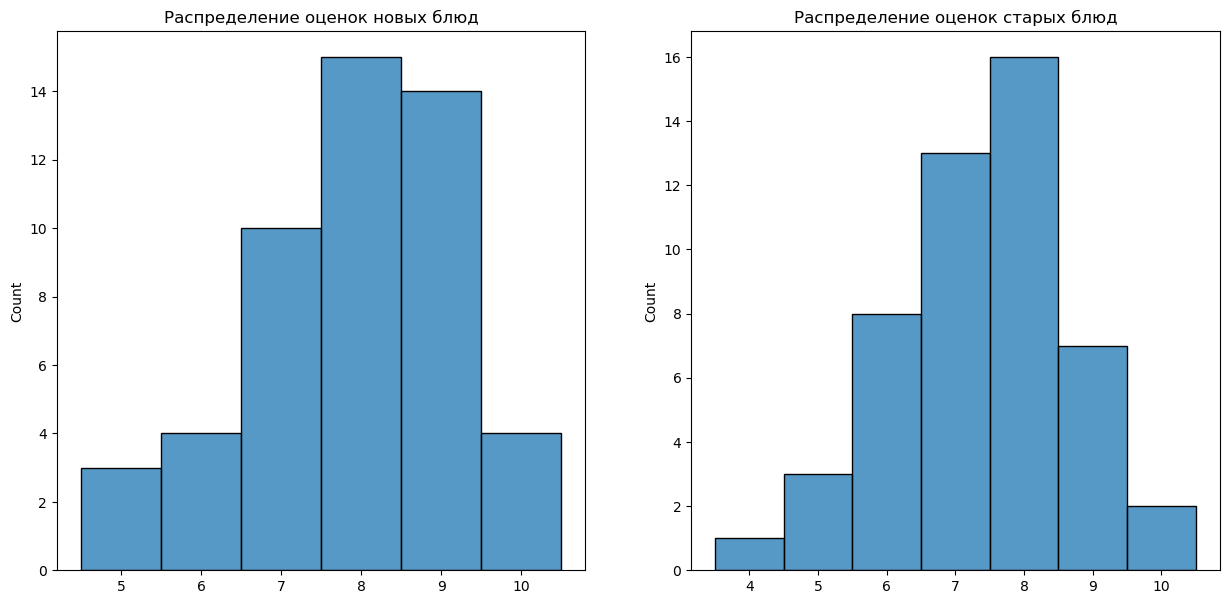

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(new, ax=axes[0], bins=np.arange(4.5, 11.5, 1))
sns.histplot(old, ax=axes[1], bins=np.arange(3.5, 11.5, 1))

axes[0].set_title("Распределение оценок новых блюд")
axes[1].set_title("Распределение оценок старых блюд")

plt.show()

$H_0 : \mu_{new} = \mu_{old}$

$H_1 : \mu_{new} \neq \mu_{old}$  или $H_1 : \mu_{new} > \mu_{old}$ или $H_1 : \mu_{new} < \mu_{old}$

$\mu$ - это среднее по группе.  

* Иначе говоря, мы пытаемся ответить на вопрос, является ли новое блюдо лучше в среднем по Генеральной Совокупности посетителей нашего ресторана

Такие задачи называются __проверкой гипотезы__ о среднем и встречаются чаще всего

Реализуйте следующую статистику, которая имеет название t-статистика: 
    
    
$T(X) = \dfrac{\overline{X}_{new} - \overline{X}_{old}}{\sqrt{{\dfrac{s^2_{new}}{n_{new}}} + \dfrac{s^2_{old}}{n_{old}}}}$  

где $\overline{X}$ - выборочные средние, $s^2$ - выборочные дисперсии, n - количество элементов в выборке.  


Такая статистика имеет [t-распределение](https://en.wikipedia.org/wiki/Student%27s_t-distribution) или иногда называют распределением Стьюдента. По форме оно очень похоже на нормальное и если быть предельно точным, то на больших выборках t-распределение стремится к нормальному. 

$T(X) \sim t(n_{new} + n_{old} - 2)$

Обернуть все в функцию, позволяющую вычислять двухвыборочный t-тест. 
Функция должна принимать следующие аргументы: 
* `sample_1`, `sample_2` - два списка выборочными данными
* `alternative` принимает одно из трех значений: `twosided`, `left`, `right`. Аргумент позволяет контролировать вид проверяемой альтернативы.
* `alpha` - уровень значимости

Функция должна распечатывать результат проверки аналогично примеру выше, а также возвращать значение статистики и `p_value`. 

In [12]:
def ttest(sample_1, sample_2, alternative="twosided", alpha=0.05):

    n1, n2 = len(sample_1), len(sample_2)
    x1, x2 = np.mean(sample_1), np.mean(sample_2)
    s1, s2 = np.var(sample_1, ddof=1), np.var(sample_2, ddof=1)
    df = n1 + n2 - 2
    sp2 = ((n1 - 1) * s1 + (n2 - 1) * s2) / df
    se = np.sqrt(sp2 * (1 / n1 + 1 / n2))

    t_stat = (x1 - x2) / se

    if alternative == "twosided":
        p_value = 2 * (1 - st.t.cdf(abs(t_stat), df=df))
    elif alternative == "right":
        p_value = 1 - st.t.cdf(t_stat, df=df)
    elif alternative == "left":
        p_value = st.t.cdf(t_stat, df=df)
    else:
        raise ValueError("alternative must be 'twosided', 'left', or 'right'")

    decision = "ОТВЕРГАЕМ H0" if p_value < alpha else "НЕ отвергаем H0"

    print(f"t-статистика = {t_stat:.4f}, df = {df}")
    print(f"p-value = {p_value:.4f}, alpha = {alpha}")
    print(f"Решение: {decision} (тест = '{alternative}')")

    return t_stat, p_value


t_stat, p_val = ttest(new, old, alternative="twosided", alpha=0.05)

t-статистика = 1.9960, df = 98
p-value = 0.0487, alpha = 0.05
Решение: ОТВЕРГАЕМ H0 (тест = 'twosided')


##### 1.3 Возьмите готовый `ttest_ind` для задачи выше и сравните результаты c вашим самописным

* небольшая разница  в результатах допустима

In [13]:
st.ttest_ind(new, old, alternative="two-sided")

TtestResult(statistic=np.float64(1.9960268449458625), pvalue=np.float64(0.048705923916779276), df=np.float64(98.0))

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add 04-03-task.ipynb`
3. Выполни команду `git commit -m "hypothesis tasks in progress"`
4. Выполни команду `git push`

## Блок 2. Применение готовых статистических тестов для проверки гипотез

*  📊 Вы не первые, кто проверяет гипотезы! 📊
*  Поэтому существуют готовые реализации статистических тестов. 
*  Давайте рассмотрим самые основные из них. 👇

### 2.1. Гипотеза о доле


Напишите функцию(или возьмите сразу готовую), которая принимает на вход количество элементов выборки а так же долю "успехов" и отвеьте на вопрос:

*  можно ли считать монетку честной, если после 100 подбрасываний, выпало 57 орлов (доля выпадения 0.57)
*  Стала ли статистически значимо эффективнее реклама, если ранее конверсия была 0.2, а сейчас на выборке из 200 элементов конверсия вышла 0.3

`Подсказка`: Можно использовать _z_test_ или _binom_test_

In [14]:
n = 100
heads = 57
p0 = 0.5
a = 0.05

p_value = st.binomtest(heads, n, p=p0, alternative="two-sided").pvalue
if p_value < a:
    print("Монета нечестная, отвергаем нулевую гипотезу")
else:
    print("Монета честная, не отвергаем нулевую гипотезу")
print(p_value)

Монета честная, не отвергаем нулевую гипотезу
0.1933479044956428


In [ ]:
n = 200
success = int(n * 0.3)
p0 = 0.2
a = 0.05

p_value = st.binomtest(success, n, p=p0, alternative="greater").pvalue

if p_value < a:
    print("Отвергаем нулевую гипотезу, реклама стала эффективнее")
else:
    print("Не отвергаем нулевую гипотезу, нет оснований считать рекламу эффективнее")
    

Отвергаем нулевую гипотезу, реклама стала эффективнее


### 2.2 Доверительный интервал

Реализовать функцию, позволяющую строить доверительный интервал для среднего. На вход функции поступает выборка (n > 20), уровень значимости. 

Воспользуйтесь методом `scipy.stats.t.interval` или же напишите его вручную по формуле из лекции

In [16]:
import numpy as np
import scipy.stats as st

x = np.array([6, 1, 2, 4, 6, 5, 5, 6, 3, 3, 6, 3, 4, 2, 2, 2, 4, 4, 3, 6], dtype=float)
n = 20
xbar = x.mean()
s = x.std(ddof=1)
se = s / np.sqrt(n)
df = n - 1

ci_low, ci_high = st.t.interval(confidence=0.95, df=df, loc=xbar, scale=se)

print(f"x={xbar:.2f}, s={s:.3f}, SE={se:.3f}, df={df}")
print(f"95% ДИ для среднего: [{ci_low:.3f}, {ci_high:.3f}]")
print("Кубик честный" if (ci_low <= 3.5 <= ci_high) else "Кубик нечестный")

x=3.85, s=1.631, SE=0.365, df=19
95% ДИ для среднего: [3.087, 4.613]
Кубик честный


* Постройте 95%-доверительный интервал для среднего кубика, у которого вот такой результат

    - [6, 1, 2, 4, 6, 5, 5, 6, 3, 3, 6, 3, 4, 2, 2, 2, 4, 4, 3, 6]
    - честный ли он? (у честного кубика мат.ожидание = 3.5)

### 2.3 Bootstrap

* Есть сервис по доставке еды, который заявляет, что среднее время их доставки составляет 20 минут

* Мы подняли все наши заказы у данного сервиса

In [17]:
sample = np.array(
    [
        10,
        13,
        18,
        8,
        14,
        15,
        14,
        15,
        10,
        14,
        21,
        20,
        18,
        13,
        10,
        13,
        11,
        10,
        21,
        16,
        18,
        21,
        22,
        20,
        25,
        14,
        12,
        14,
        11,
        16,
        30,
        29,
        30,
        31,
        28,
        28,
        24,
        48,
        35,
        50,
        33,
        18,
        31,
        22,
        33,
        27,
        28,
        44,
        22,
        23,
        28,
        23,
        22,
        30,
        27,
        30,
        30,
        41,
        26,
        29,
        35,
        28,
        27,
        22,
        25,
        33,
        28,
        7,
        19,
        15,
        20,
        36,
        22,
        17,
        17,
        29,
        14,
        31,
        11,
        16,
        24,
        13,
        15,
        21,
        30,
        26,
        19,
        21,
        13,
        16,
        29,
        37,
        26,
        15,
        21,
        24,
        12,
        27,
        18,
        32,
        33,
        47,
        23,
        33,
        17,
        19,
        25,
        15,
        14,
        20,
        23,
        13,
        44,
        33,
        48,
        34,
        34,
        28,
        27,
        21,
        26,
        44,
        41,
    ]
)


* Постройте 95%-доверительный интервал для среднего времени доставки

In [22]:
res_mean = st.bootstrap(
    (sample,),
    np.mean,
    vectorized=False,
    paired=False,
    confidence_level=0.95,
    n_resamples=100_000,
)


res_med = st.bootstrap(
    (sample,),
    np.median,
    vectorized=False,
    paired=False,
    confidence_level=0.95,
    n_resamples=100_000,
)


res_var = st.bootstrap(
    (sample,),
    lambda x: np.var(x, ddof=1),
    vectorized=False,
    paired=False,
    confidence_level=0.95,
    n_resamples=100_000,
)

print(
    f"95% ДИ для среднего:  [{res_mean.confidence_interval.low:.2f}, {res_mean.confidence_interval.high:.2f}]"
)
print(
    f"95% ДИ для медианы:   [{res_med.confidence_interval.low:.2f}, {res_med.confidence_interval.high:.2f}]"
)
print(
    f"95% ДИ для дисперсии: [{res_var.confidence_interval.low:.2f}, {res_var.confidence_interval.high:.2f}]"
)


mu0 = 20
low, high = res_mean.confidence_interval.low, res_mean.confidence_interval.high
print(
    "Заявление μ=20:",
    (
        "совместимо (не отвергаем H0)"
        if (low <= mu0 <= high)
        else "не совместимо (отвергаем H0)"
    ),
)

95% ДИ для среднего:  [22.06, 25.39]
95% ДИ для медианы:   [20.00, 24.00]
95% ДИ для дисперсии: [70.39, 116.65]
Заявление μ=20: не совместимо (отвергаем H0)


Также можно посчитать дополнительно:

* Постройте 95%-доверительный интервал для медианы времени доставки
* Постройте 95%-доверительный интервал для дисперсии времени доставки

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add 04-02-task.ipynb`
3. Выполни команду `git commit -m "hypothesis tasks done"`
4. Выполни команду `git push`

## Блок 3. Дополнительные задания. "Набить руку" (не является обязательным)

### 3.1 Оценка эффективности рекламы
 

* Вы провели эксперимент, в рамках которого 1000 человек увидели рекламу нового продукта, а 1000 человек не увидели. 
* После проведения эксперимента вы получили следующие результаты: 
    - 100 человек из тех, кто увидел рекламу, купили продукт
    - 50 человек из тех, кто не увидел рекламу, купили продукт
 * Проверьте гипотезу о том, что реклама не влияет на покупку продукта на уровне значимости $\alpha = 0.05$. В ответ запишите достигаемый уровень значимости с точностью до четвертого знака.

In [19]:
# your code

### 3.2 Студенты 

* Допустим, вы думаете, что $25\%$ студентов вашего университета ни разу не пропустили ни одной лекции. В выборочном опросе из $75$ случайных студентов таких оказалось $15$ человек. Проверьте свою гипотезу на уровне значимости $\alpha = 0.02$ против двусторонних альтернатив. В ответ запишите достигаемый уровень значимости с точностью до четвертого знака.

In [20]:
# your code

### 3.3 Медицинский кейс

* Пусть для группы из $n = 25$ пациентов вычислено среднее артериальное давление $\bar{x} = 100$ мм рт. ст. Из предыдущих исследований известно стандартное отклонение $\sigma = 12$ мм рт. ст. Постройте $98\%$ доверительный интервал для среднего артериального давления.

In [21]:
# your code

### 3.4 Свой StatTester

Реализуй класс, позволяющий проводить проверку гипотезу о средних для двух выборок. 
1. В конструктор класса передаются две выборки
2. Пользователь выбирает тип задачи (Гипотеза о доле или среднем). Исходя из выборка выбираем либо `z-статистику`, либо `t-статистику`
3. В методе `test` проводится тестирование, метод возвращает значение статистики, p_value и результат проверки
4. Выбирается альтернатива: двухсторонняя, правая или левая
5. Уровень значимости по умолчанию равен $0.05$ (может быть переназначен пользователем)
6. Добавь метод, позволяющий вычислять доверительные интервалы для средних для обеих выборок

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add 04-03-task.ipynb`
3. Выполни команду `git commit -m "total tasks done"`
4. Выполни команду `git push`